SGD


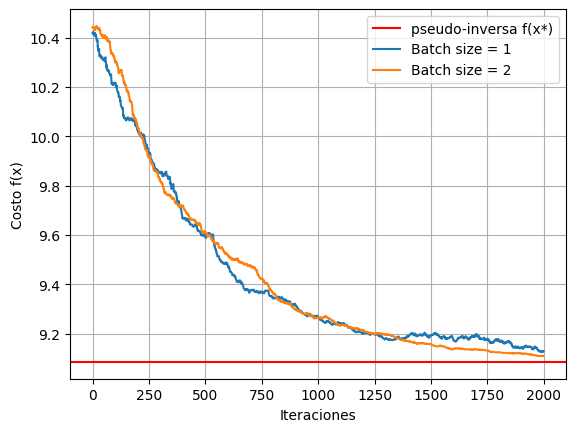

Costo pseudo-inversa: 9.086011521567416
Costo final (mini-batch 1): 9.128664468183391
Costo final (mini-batch 2): 9.110469698426648
Error final (mini-batch 1): 0.07615460377949616
Error final (mini-batch 2): 0.0543658248359091


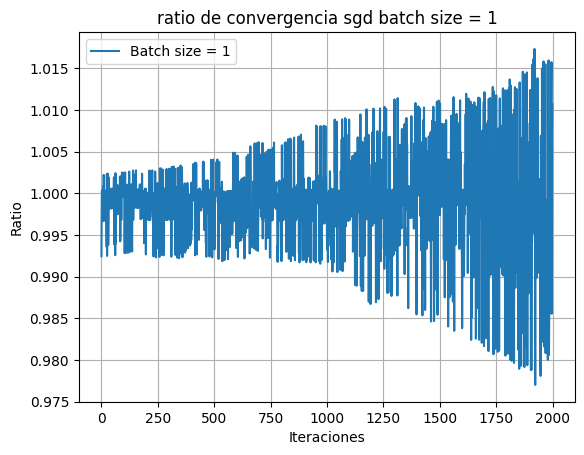

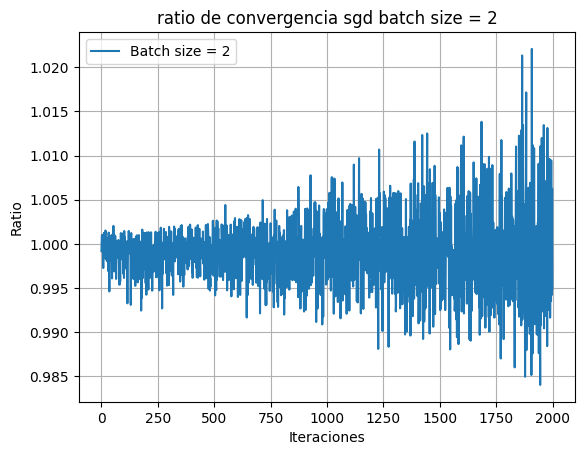

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

steps = 2000
total_rows = 20
total_columns = 4
A = np.random.randn(total_rows, total_columns)
#vector de resultados
b = np.random.randn(total_rows)

batch_size = 1
#matriz hessiana
H = A.T @ A

eigenvalues = np.linalg.eigvalsh(H)
#maximo autovalor
eig_max = np.max(eigenvalues)
#minimo autovalor
eig_min = np.min(eigenvalues)
#alfa y beta necesario para SGD normal y con momentum
alpha = (2 / (np.sqrt(eig_max) + np.sqrt(eig_min)))**2
beta = ((np.sqrt(eig_max) - np.sqrt(eig_min)) / (np.sqrt(eig_max) - np.sqrt(eig_min)))**2


#vector de resultados por el metodo pseudo inversa x*
x_star = np.linalg.solve(A.T @ A, A.T @ b)

#funcion de costo
def fx(xdk):
  return 0.5 * np.linalg.norm(A @ xdk - b)**2

#gradiente usando la fila Ai de la matriz A y el elemento bi del vector de resultados (mismo indice)
#cambio a multiplicacion regular ya que bi es un escalar
def gradient(xdk, Ai, bi):
  return Ai.T * (Ai @ xdk - bi)


def sgd(alpha_init,batch_size):
  history = []
  x = np.zeros(total_columns)
  convergence_rate = []
  for i in range(steps):
    idx = np.random.choice(total_rows, size=batch_size)
    Ai = A[idx]
    bi = b[idx]
    geval = 0
    for j in range(batch_size):
      geval = geval + gradient(x, Ai[j], bi[j])
    xk = x
    x = x - alpha_init * 1/batch_size * geval
    #x => xk+1
    #xk => x
    #|| xk+1 − x*|| / || xk − x*||
    convergence_rate.append(np.linalg.norm(x - x_star) / np.linalg.norm(xk - x_star))
    history.append(fx(x))

  return x,history,convergence_rate

constant_alpha = 1e-2
constant_alpha_2 = 1e-3
x1, hist1,convergence_rate1 = sgd(alpha_init = constant_alpha_2, batch_size=1)
x2, hist2,convergence_rate2 = sgd(alpha_init = constant_alpha_2, batch_size=2)

plt.figure(0)
plt.axhline(fx(x_star), color='r', linestyle='-', label='pseudo-inversa f(x*)')
plt.plot(hist1, label="Batch size = 1")
plt.plot(hist2, label="Batch size = 2")
plt.xlabel('Iteraciones')
plt.ylabel('Costo f(x)')
plt.legend()
plt.grid()
plt.show()

print("Costo pseudo-inversa:" , fx(x_star))
print("Costo final (mini-batch 1):", fx(x1))
print("Costo final (mini-batch 2):", fx(x2))
print("Error final (mini-batch 1):", np.linalg.norm(x1 - x_star))
print("Error final (mini-batch 2):", np.linalg.norm(x2 - x_star))

plt.figure(1)
plt.plot(convergence_rate1, label="Batch size = 1")
plt.xlabel('Iteraciones')
plt.ylabel('Ratio')
plt.title('ratio de convergencia sgd batch size = 1')
plt.legend()
plt.grid()
plt.show()

plt.figure(2)
plt.plot(convergence_rate2, label="Batch size = 2")
plt.xlabel('Iteraciones')
plt.ylabel('Ratio')
plt.title('ratio de convergencia sgd batch size = 2')
plt.legend()
plt.grid()
plt.show()


ADAGRAD

Costo pseudo-inversa: 9.086011521567416
Costo ADAGRAD: 9.177479012363824
Error ADAGRAD contra la pseudo-inversa: 0.10567986604180687


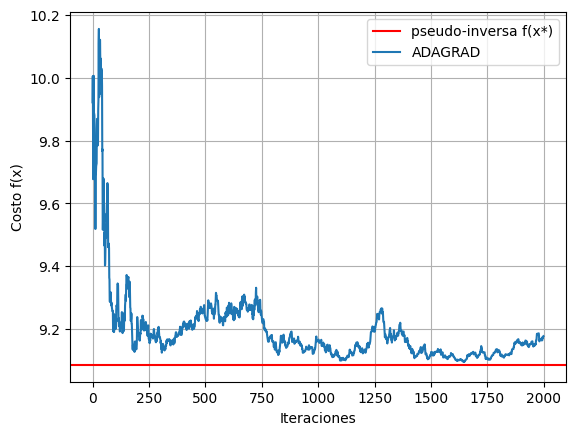

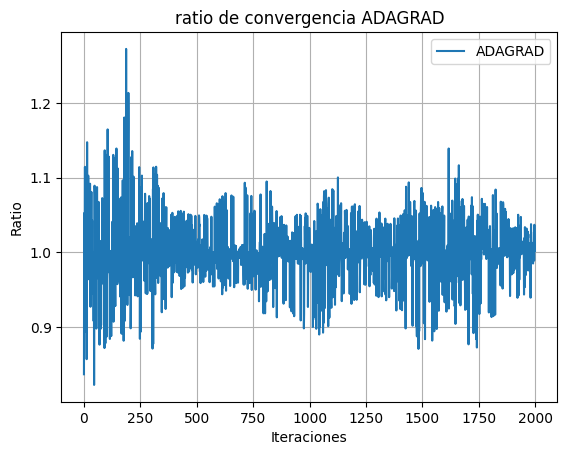

In [ ]:

def adagrad(alpha_init=0.1, delta=1e-2):
  history = []
  x = np.zeros(total_columns)
  convergence_rate = []
  geval = np.zeros(total_columns)
  for i in range(steps):
    idx = np.random.choice(total_rows)
    Ai = A[idx]
    bi = b[idx]
    gradient_value = gradient(x, Ai, bi)
    xk = x
    geval = geval + gradient_value**2
    x = x - alpha_init/(np.sqrt(geval) + delta) * gradient_value
    #x => xk+1
    #xk => x
    #|| xk+1 − x*|| / || xk − x*||
    convergence_rate.append(np.linalg.norm(x - x_star) / np.linalg.norm(xk - x_star))
    history.append(fx(x))

  return x,history,convergence_rate


x_ada,history_ada,convergence_rate_ada = adagrad()
print("Costo pseudo-inversa:" , fx(x_star))
print("Costo ADAGRAD:", fx(x_ada))
print("Error ADAGRAD contra la pseudo-inversa:", np.linalg.norm(x_ada - x_star))


plt.figure(0)
plt.axhline(fx(x_star), color='r', linestyle='-', label='pseudo-inversa f(x*)')
plt.plot(history_ada, label="ADAGRAD")
plt.xlabel('Iteraciones')
plt.ylabel('Costo f(x)')
plt.legend()
plt.grid()
plt.show()

plt.figure(1)
plt.plot(convergence_rate_ada, label="ADAGRAD")
plt.xlabel('Iteraciones')
plt.ylabel('Ratio')
plt.title('ratio de convergencia ADAGRAD')
plt.legend()
plt.grid()


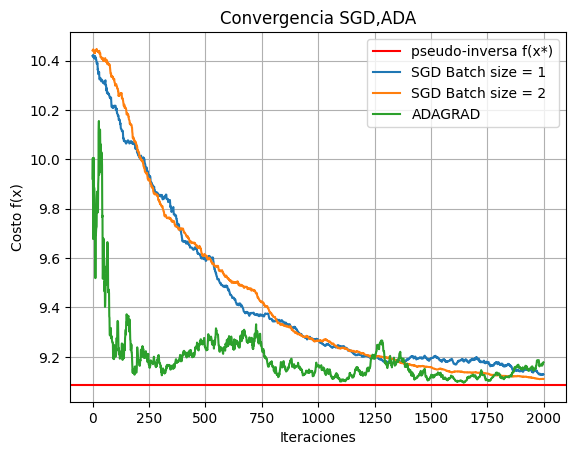

In [ ]:
plt.figure(0)
plt.axhline(fx(x_star), color='r', linestyle='-', label='pseudo-inversa f(x*)')
plt.plot(hist1, label="SGD Batch size = 1")
plt.plot(hist2, label="SGD Batch size = 2")
plt.plot(history_ada, label="ADAGRAD")
plt.xlabel('Iteraciones')
plt.ylabel('Costo f(x)')
#ada converge mucho mas rapido, pero necesita un alfa mayor
plt.title('Convergencia SGD,ADA')
plt.legend()
plt.grid()
plt.show()

Costo pseudo-inversa: 9.086011521567416
Costo RMSProp: 9.216942882053058


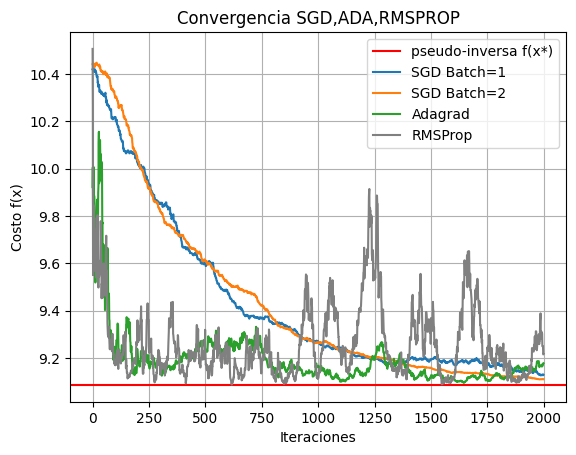

In [ ]:
def rmsprop(alpha_init=0.009, beta= 0.99, delta=1e-2):
  history = []
  x = np.zeros(total_columns)
  convergence_rate = []
  geval = np.zeros(total_columns)
  for i in range(steps):
    idx = np.random.choice(total_rows)
    Ai = A[idx]
    bi = b[idx]
    gradient_value = gradient(x, Ai, bi)
    xk = x
    geval = beta * geval + (1 - beta) * gradient_value**2
    x = x - alpha_init/(np.sqrt(geval) + delta) * gradient_value
    #x => xk+1 (x nuevo)
    #xk => x (paso anterior)
    #|| xk+1 − x*|| / || xk − x*|| (calculo de rate de convergencia)
    convergence_rate.append(np.linalg.norm(x - x_star) / np.linalg.norm(xk - x_star))
    history.append(fx(x))

  return x,history,convergence_rate

x_rms,history_rms,convergence_rate_rms = rmsprop()
print("Costo pseudo-inversa:" , fx(x_star))
print("Costo RMSProp:", fx(x_rms))

plt.figure(0)
plt.axhline(fx(x_star), color='r', linestyle='-', label='pseudo-inversa f(x*)')
plt.plot(hist1, label="SGD Batch=1")
plt.plot(hist2, label="SGD Batch=2")
plt.plot(history_ada, label="Adagrad")
plt.plot(history_rms, label="RMSProp", color = 'gray')
plt.xlabel("Iteraciones")
plt.ylabel("Costo f(x)")
plt.legend()
plt.grid()
plt.title("Convergencia SGD,ADA,RMSPROP")
plt.show()

Costo pseudo-inversa: 9.086011521567416
Costo ADAM: 9.26310275776065


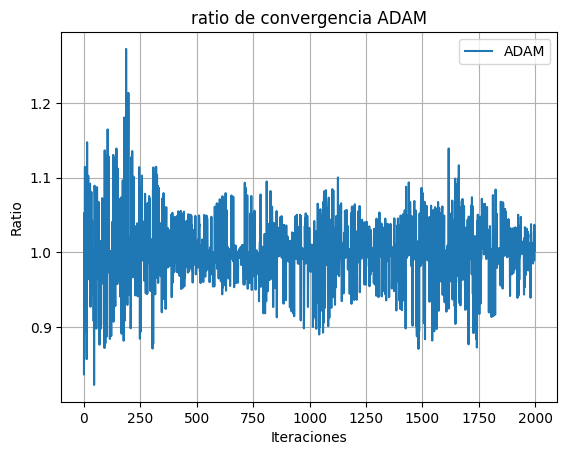

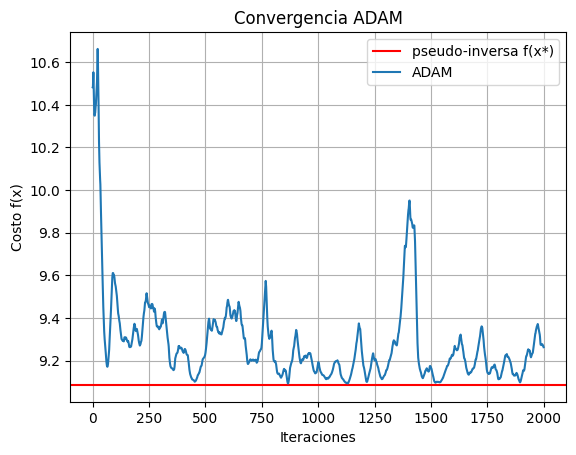

In [ ]:

def adam(alpha_init=0.09, beta= 0.9,beta2= 0.99, delta=1e-3):
  history = []
  x = np.zeros(total_columns)
  s = np.zeros(total_columns)
  r = np.zeros(total_columns)
  convergence_rate = []
  for i in range(steps):
    idx = np.random.choice(total_rows)
    Ai = A[idx]
    bi = b[idx]
    gradient_value = gradient(x, Ai, bi)
    xk = x
    s = s * beta  + (1 - beta)  * gradient_value
    r = r * beta2 + (1 - beta2) * gradient_value**2
    #s sombrero
    s_hat = s / (1 - beta)
    #r sombrero
    r_hat = r / (1 - beta2)

    #xk+1
    x = x - alpha_init/(np.sqrt(r_hat) + delta) * s_hat
    #x => xk+1
    #xk => x
    #|| xk+1 − x*|| / || xk − x*||
    convergence_rate.append(np.linalg.norm(x - x_star) / np.linalg.norm(xk - x_star))
    history.append(fx(x))

  return x,history,convergence_rate


x_adam,history_adam,convergence_rate_adam = adam(alpha_init=0.01, beta= 0.9, beta2=0.99,delta= 1e-8)
print("Costo pseudo-inversa:" , fx(x_star))
print("Costo ADAM:", fx(x_adam))

plt.figure(0)
plt.plot(convergence_rate_ada, label="ADAM")
plt.xlabel('Iteraciones')
plt.ylabel('Ratio')
plt.title('ratio de convergencia ADAM')
plt.legend()
plt.grid()


plt.figure(1)
plt.axhline(fx(x_star), color='r', linestyle='-', label='pseudo-inversa f(x*)')
plt.plot(history_adam, label="ADAM")
plt.xlabel('Iteraciones')
plt.ylabel('Costo f(x)')
plt.title('Convergencia ADAM')
plt.legend()
plt.grid()
plt.show()
